<a href="https://colab.research.google.com/github/PDmitrii/sql_tasks_sber_d_a/blob/main/SberDA_hw_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import psycopg2
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
DB_HOST='52.157.159.24'
DB_USER='student14'
DB_USER_PASSWORD='student14_password'
DB_NAME='sql_ex_for_student14'
conn=psycopg2.connect(host=DB_HOST,user=DB_USER,password=DB_USER_PASSWORD,dbname=DB_NAME)
cur=conn.cursor()

In [3]:
request_1l5="""
              select 
              *,
              --row_number() over (order by model) rn,
              case 
                when mod(row_number() over (order by model),2)=0 
                then 2 
                else 1 
              end as num_on_page,
              div(row_number() over (order by model)+1,2) as page_num
              from 	(	select model, code,'PC' as type from pc
                    union all
                    select model,code,'Laptop' from laptop
                    union all
                    select model,code,'Printer' from printer
                  ) a
            """

df_1l5=pd.read_sql_query(request_1l5,conn)
df_1l5

,model,code,type,num_on_page,page_num
0,1121,4,PC,1,1.0
1,1121,2,PC,2,1.0
2,1121,5,PC,1,2.0
3,1232,1,PC,2,2.0
4,1232,7,PC,1,3.0
5,1232,8,PC,2,3.0
6,1232,9,PC,1,4.0
7,1233,12,PC,2,4.0
8,1233,3,PC,1,5.0
9,1233,6,PC,2,5.0


In [4]:
request_2l5="""
              select 
              *,
              --row_number() over (order by model) rn,
              case 
                when mod(row_number() over (order by model),2)=0 
                then 2 
                else 1 
              end as num_on_page,
              div(row_number() over (order by model)+1,2) as page_num
              from 	(	select model, code,'PC' as type from pc
                    union all
                    select model,code,'Laptop' from laptop
                    union all
                    select model,code,'Printer' from printer
                  ) a
            """

df_2l5=pd.read_sql_query(request_2l5,conn)
df_2l5

,model,code,type,num_on_page,page_num
0,1121,4,PC,1,1.0
1,1121,2,PC,2,1.0
2,1121,5,PC,1,2.0
3,1232,1,PC,2,2.0
4,1232,7,PC,1,3.0
5,1232,8,PC,2,3.0
6,1232,9,PC,1,4.0
7,1233,12,PC,2,4.0
8,1233,3,PC,1,5.0
9,1233,6,PC,2,5.0


In [5]:
request_3l5="""
                select 
                distinct
                maker,
                type,
                round(100.0*count(model) over (partition by maker,type)/count(model) over (partition by maker),2) as fraction
                from product
                order by maker,type
            """

df_3l5=pd.read_sql_query(request_3l5,conn)
df_3l5

,maker,type,fraction
0,A,Laptop,28.57
1,A,PC,28.57
2,A,Printer,42.86
3,B,Laptop,50.00
4,B,PC,50.00
5,C,Laptop,100.00
6,D,Printer,100.00
7,E,PC,75.00
8,E,Printer,25.00


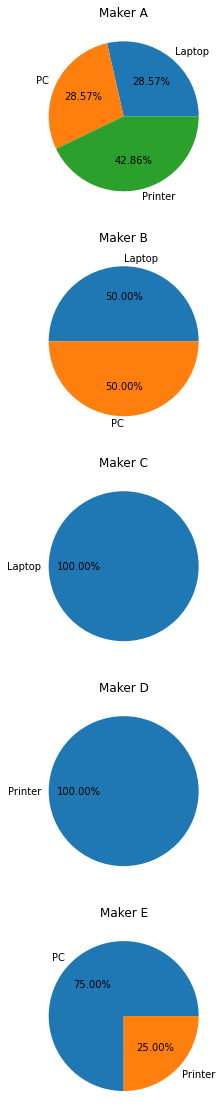

In [6]:
cnt_diag=len(df_3l5['maker'].unique())
plt.figure(figsize=(8,20))
i=1
for mk in df_3l5['maker'].unique():
  plt.subplot(cnt_diag,1,i)
  plt.pie(df_3l5[df_3l5['maker']==mk]['fraction'],labels=df_3l5[df_3l5['maker']==mk]['type'],autopct='%1.2f%%')
  plt.title('Maker '+ mk)
  i+=1;

In [7]:
request_4l5="""
                -- create table ships_two_words as
                select 
                *
                from ships
                where name like '% %'
            """

df_4l5=pd.read_sql_query(request_4l5,conn)
df_4l5

,name,class,launched
0,New Jersey,Iowa,1943
1,North Carolina,North Carolina,1941
2,Royal Oak,Revenge,1916
3,Royal Sovereign,Revenge,1916
4,South Dakota,North Carolina,1941


In [8]:
request_5l5="""
                select 
                *
                from ships
                where class is null and name like 'S%'
            """

df_5l5=pd.read_sql_query(request_5l5,conn)
df_5l5

,name,class,launched


In [10]:
request_6l5="""
                with base as 
                      (select 
                      t1.model,
                      t1.price,
                      t2.maker,
                      avg(price) over (partition by maker) as avg_price
                      from printer t1 
                      left join product t2 
                      on t1.model = t2.model and t2.type='Printer')
                select
                model 
                from base
                where maker='A' and price>(	select 
                              coalesce(avg(price),0) 
                              from base 
                              where maker='C'
                              )
                union
                select 
                a.model
                from
                (select
                model,
                row_number() over(order by price desc) as rn
                from printer) a
                where a.rn<=3
            """

df_6l5=pd.read_sql_query(request_6l5,conn)
df_6l5

,model
0,1434
1,1401
2,1408
3,1276
4,1288
